In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd


pd.set_option("display.max_columns", None)

In [2]:
def get_rc(i, cols):
    r = i // cols + 1
    c = i % cols + 1

    return (r, c)


def get_rows_columns(df, c=5):
    COLUMNS = c
    d, m = divmod(df.shape[0], COLUMNS)
    ROWS = d + (1 if m > 0 else m)

    return ROWS, COLUMNS


def get_fig_subplots(df, ROWS, COLUMNS):
    fig = make_subplots(
        rows=ROWS,
        cols=COLUMNS,
        subplot_titles=df.index.values,
        specs=[[{"type": "polar"} for _ in range(COLUMNS)] for _ in range(ROWS)],
    )

    return fig


def get_min_max_value(df, columns):
    min_value = df[columns].unstack().min()
    max_value = df[columns].unstack().max()

    return min_value, max_value


def get_theta_list(df, name, origin_columns, columns):
    return [
        f"{col} - {round(value, ndigits=1)}"
        for col, value in zip(columns, df.loc[name, origin_columns].values)
    ]


def plot_radar_charts(fig, df, origin_columns, columns, ROWS, COLUMNS):
    for i, name in enumerate(df.index):
        _df = df.loc[name, columns]
        theta_list = [
            f"{col} - {round(value, ndigits=1)}"
            for col, value in zip(columns, df.loc[name, origin_columns].values)
        ]

        r, c = get_rc(i, COLUMNS)
        fig.add_trace(
            go.Scatterpolar(r=df, theta=theta_list, fill="toself", name=name),
            row=r,
            col=c,
        )
    fig.update_layout(
        height=400 * ROWS,
        showlegend=False,
        polar=dict(radialaxis=dict(visible=True)),
        title=dict(y=1),
    )
    fig.update_annotations(yshift=20)
    fig.update_polars(radialaxis=dict(range=[min_value - 0.2, max_value + 0.2]))

    return fig

In [3]:
teams_stats = pd.read_csv("./csv/stats/teams.csv", index_col="Team")
print(teams_stats.shape)
teams_stats.head()

(10, 12)


,Games,Win,Loss,WinRate,KD,CKPM,GameDuration,WinGameDuration,LossGameDuration,GPM,GDPM,KPM
Team,,,,,,,,,,,,
100 Thieves,3.0,1.0,2.0,0.333333,0.766667,0.541887,32.538889,30.516667,33.550000,1729.418163,-64.978672,0.245358
Cloud9,3.0,3.0,0.0,1.000000,2.086957,0.849577,27.811111,27.811111,NaN,2024.749633,377.869824,0.575488
Dignitas,3.0,1.0,2.0,0.333333,0.622222,0.808316,30.205556,35.700000,27.458333,1675.265785,-259.787836,0.289670
Evil Geniuses.NA,3.0,2.0,1.0,0.666667,1.500000,0.753081,30.611111,28.066667,35.700000,1857.933548,197.569833,0.478800
FlyQuest,3.0,0.0,3.0,0.000000,0.500000,0.696175,33.711111,NaN,33.711111,1641.243832,-303.497445,0.220214


In [4]:
scaler = StandardScaler()
origin_columns = ["KD", "CKPM", "GPM", "GDPM", "KPM"]
columns = ["_" + col for col in origin_columns]
teams_stats[columns] = scaler.fit_transform(teams_stats[origin_columns])
teams_stats.head()

,Games,Win,Loss,WinRate,KD,CKPM,GameDuration,WinGameDuration,LossGameDuration,GPM,GDPM,KPM,_KD,_CKPM,_GPM,_GDPM,_KPM
Team,,,,,,,,,,,,,,,,,
100 Thieves,3.0,1.0,2.0,0.333333,0.766667,0.541887,32.538889,30.516667,33.550000,1729.418163,-64.978672,0.245358,-0.546775,-2.611819,-0.520860,-0.255342,-1.018075
Cloud9,3.0,3.0,0.0,1.000000,2.086957,0.849577,27.811111,27.811111,NaN,2024.749633,377.869824,0.575488,1.064302,1.235561,1.709654,1.484889,1.566806
Dignitas,3.0,1.0,2.0,0.333333,0.622222,0.808316,30.205556,35.700000,27.458333,1675.265785,-259.787836,0.289670,-0.723032,0.719625,-0.929850,-1.020870,-0.671117
Evil Geniuses.NA,3.0,2.0,1.0,0.666667,1.500000,0.753081,30.611111,28.066667,35.700000,1857.933548,197.569833,0.478800,0.348071,0.028969,0.449762,0.776376,0.809754
FlyQuest,3.0,0.0,3.0,0.000000,0.500000,0.696175,33.711111,NaN,33.711111,1641.243832,-303.497445,0.220214,-0.872173,-0.682585,-1.186803,-1.192633,-1.214953


C:\Users\pjm58\AppData\Local\Temp\ipykernel_56300\879664895.py:6: RuntimeWarning: divide by zero encountered in divide
  x = 100 / y


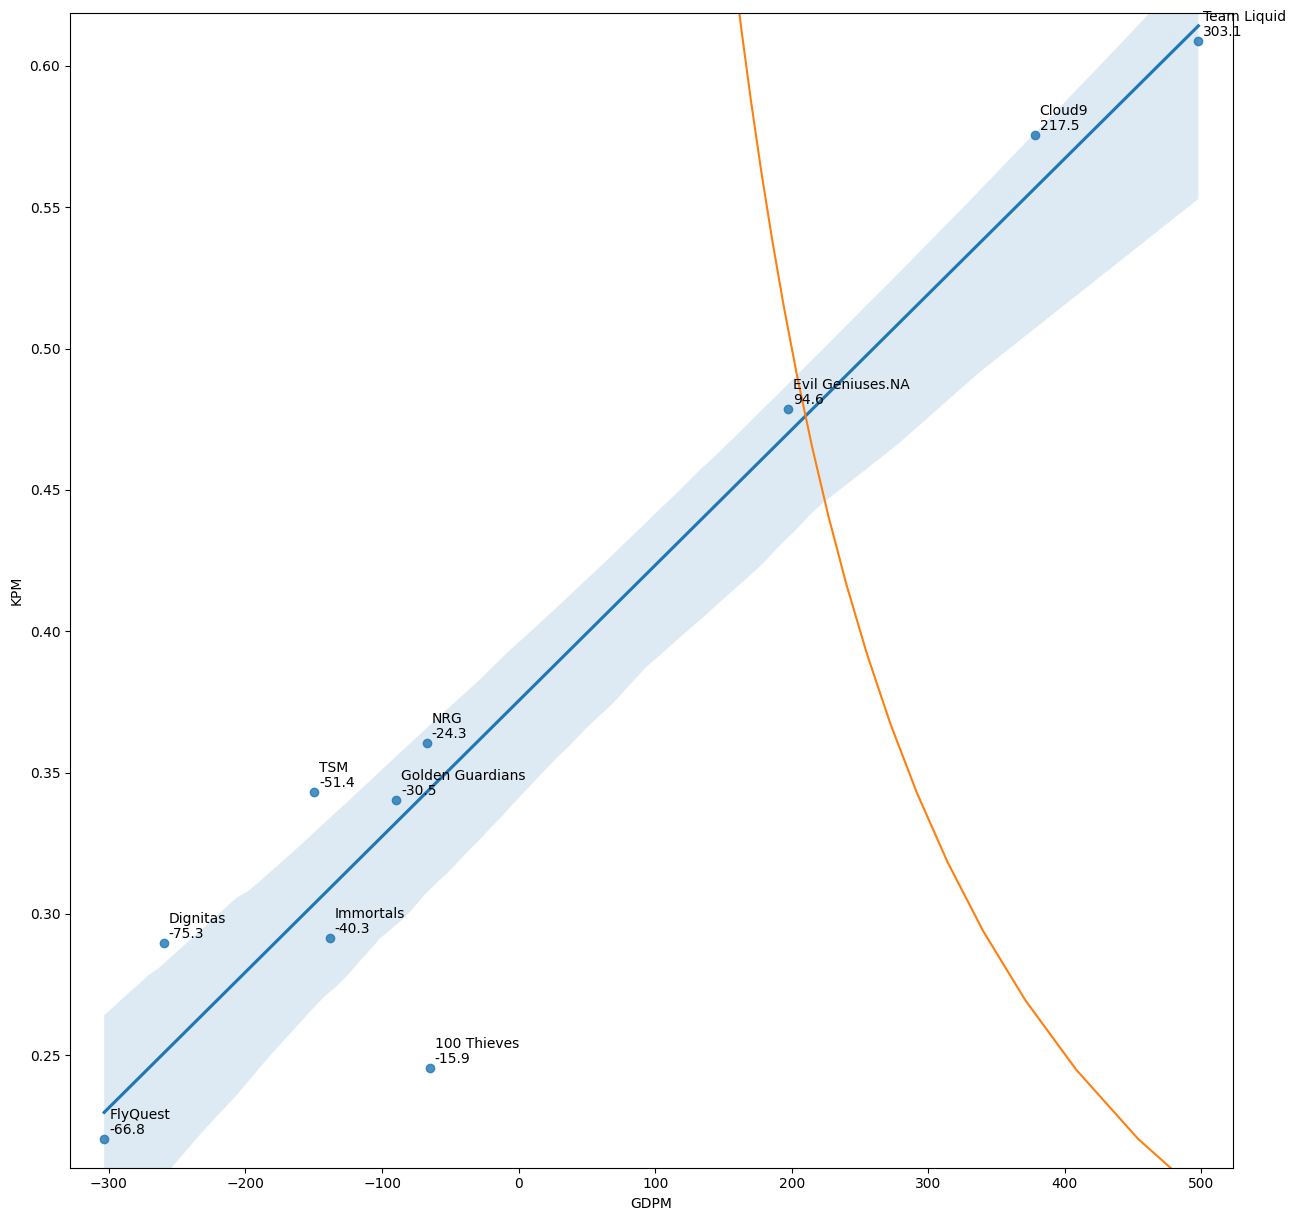

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.set_xlim(teams_stats["GDPM"].min() - 25, teams_stats["GDPM"].max() + 25)
ax.set_ylim(teams_stats["KPM"].min() - 0.01, teams_stats["KPM"].max() + 0.01)
ax = sns.regplot(data=teams_stats, x="GDPM", y="KPM")
y = np.linspace(0, 1.2)
x = 100 / y
sns.lineplot(x=x, y=y)
for idx, i in zip(teams_stats.index, range(teams_stats.shape[0])):
    row = teams_stats.iloc[i]
    plt.annotate(
        idx, xy=(row["GDPM"], row["KPM"]), xytext=(5, 20), textcoords="offset pixels"
    )
    plt.annotate(
        round(row["GDPM"] * row["KPM"], ndigits=1),
        xy=(row["GDPM"], row["KPM"]),
        xytext=(5, 5),
        textcoords="offset pixels",
    )

In [6]:
import plotly.io as pio

ROWS, COLUMNS = get_rows_columns(teams_stats)
min_value, max_value = get_min_max_value(teams_stats, columns)

fig = get_fig_subplots(teams_stats, ROWS, COLUMNS)
for i, team_name in enumerate(teams_stats.index):
    df = teams_stats.loc[team_name, columns]
    theta_list = get_theta_list(teams_stats, team_name, origin_columns, columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=df, theta=theta_list, fill="toself", name=team_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(radialaxis=dict(range=[min_value - 0.2, max_value + 0.2]))
fig.show()

In [7]:
players_stats = pd.read_csv("./csv/stats/players_by_position.csv", index_col="Player")
players_stats.shape

(50, 19)

In [8]:
columns = [
    "_KDA",
    "_DPM",
    "_CSPM",
    "_Gold",
    "_GPM",
    "_KP",
    "_KS",
    "_GS",
    "_ChampionsPlayed",
]
origin_columns = [col[1:] for col in columns]
positions = ["Top", "Jungle", "Mid", "Bot", "Support"]

In [9]:
for position in positions:
    scaler = StandardScaler()
    df = players_stats.loc[players_stats["Position"] == position]
    players_stats.loc[
        players_stats["Position"] == position, columns
    ] = scaler.fit_transform(df[origin_columns])

In [12]:
df = players_stats.loc[players_stats["Position"] == positions[0]]
min_value, max_value = get_min_max_value(df, columns)

ROWS, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns, columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(radialaxis=dict(range=[min_value - 0.2, max_value + 0.2]))
fig.show()

In [13]:
df = players_stats.loc[players_stats["Position"] == positions[1]]
min_value, max_value = get_min_max_value(df, columns)

ROW, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns, columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(radialaxis=dict(range=[min_value - 0.2, max_value + 0.2]))
fig.show()

In [14]:
df = players_stats.loc[players_stats["Position"] == positions[2]]
min_value, max_value = get_min_max_value(df, columns)

ROW, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns, columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(radialaxis=dict(range=[min_value - 0.2, max_value + 0.2]))
fig.show()

In [15]:
df = players_stats.loc[players_stats["Position"] == positions[3]]
min_value, max_value = get_min_max_value(df, columns)

ROW, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns, columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(radialaxis=dict(range=[min_value - 0.2, max_value + 0.2]))
fig.show()

In [16]:
df = players_stats.loc[players_stats["Position"] == positions[4]]
min_value, max_value = get_min_max_value(df, columns)

ROW, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns, columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(radialaxis=dict(range=[min_value - 0.2, max_value + 0.2]))
fig.show()